# Box Office Analysis for Microsoft Studios


## Overview:
Microsoft has decided to create a new movie studio. Our aim is to guide the newly founded Microsoft Studios in what kind of films they should focus on. We have analyzed historical data (focusing on cost and revenue) for both movies and directors in order to measure success and to discover any insights that may help guide Microsoft Studios to succeed and become the next film industry giant.


## Business Problem:
In order for Microsoft to be successful, box office films were analyzed to see the contributing factors that make a film successful. These factors were then leveraged to create actionable recommendations for the head of Microsoft Studios to guide their decision-making in determining what type of films to create.


## Hypothesis:
1. There is an optimal time in the year to release a film.
2. Certain directors have higher grossings films than others.
3. There are certain genres that are the more profitable when compared to others.

## Analysis Focus:
1. Our analysis will focus on movies from 2010 - 2018. 
2. Explore which films are succeeding at the box office.
3. Advise and provide recomendations to ensure that Microsoft Studios' films are successful.


*********************


### Importing libraries and data into DataFrames

In [1]:
#Import neccessary libraries
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
from warnings import filterwarnings
filterwarnings('ignore')

>Imported all the CSV/TSV files to parse through and decide which would be best to use.

In [2]:
#Import the data
df_mojo_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df_imdb_name_basics = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
df_imdb_title = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
df_imdb_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
df_imdb_title_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
df_imdb_title_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
df_imdb_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
df_rt_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t', encoding = 'unicode_escape')
df_rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding = 'unicode_escape')
df_tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
df_tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [3]:
#Put data in a list to easily iterate through them
list_of_data = [df_mojo_gross, df_imdb_name_basics, df_imdb_title, df_imdb_basics, df_imdb_title_crew,
               df_imdb_title_principals, df_imdb_title_ratings, df_rt_movie_info, df_rt_reviews, df_tmdb_movies, 
                df_tn_movie_budgets]

In [4]:
#Previewing all the provided data
for df in list_of_data:
    display(df.head())

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
#Displaying the shape of each dataframe
for df in list_of_data:
    display(df.shape)

(3387, 5)

(606648, 6)

(331703, 8)

(146144, 6)

(146144, 3)

(1028186, 6)

(73856, 3)

(1560, 12)

(54432, 8)

(26517, 10)

(5782, 6)

***
###### Initial thoughts
To find the answers to our first and third hypotheses, we concluded that the The Numbers Movie Budget CSV and The Movie Database CSV were perfect to analyze. The Numbers Movie Budget CSV contained the movie, the production budget, domestic gross, and worldwide gross. The Movie Database CSV contained the genre ids, the title, and the release date.

So, with that in mind, we began to clean both dataframes to ultimately merge the two.

### Visualizing DataFrames

In [6]:
#Retrieving the datatypes of all columns in The Movie DataBase CSV
df_tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [7]:
#Retrieving the datatypes of all columns in The Numbers Movie Budget CSV
df_tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Data Cleaning

The first step, after choosing our particular dataframes, was to clean the columns in order to reference the data properly. The columns in question were `production_budget_edited`, `domestic_gross_edited`, and `worldwide_gross_edited`. We removed the punctuations and symbols, then converted the datatypes to a float.

In [8]:
#Remove '$' and ',' and convert to float for `production_budget_edited` , `domestic_gross_edited`
    #and `worldwide_gross_edited`
df_tn_movie_budgets['production_budget_edited'] = df_tn_movie_budgets.production_budget.str.replace('$', '')
df_tn_movie_budgets['production_budget_edited'] = df_tn_movie_budgets['production_budget_edited'].str.replace(',', '')
df_tn_movie_budgets['production_budget_edited'] = df_tn_movie_budgets['production_budget_edited'].astype(float)

df_tn_movie_budgets['domestic_gross_edited'] = df_tn_movie_budgets.domestic_gross.str.replace('$', '')
df_tn_movie_budgets['domestic_gross_edited'] = df_tn_movie_budgets['domestic_gross_edited'].str.replace(',', '')
df_tn_movie_budgets['domestic_gross_edited'] = df_tn_movie_budgets['domestic_gross_edited'].astype(float)

df_tn_movie_budgets['worldwide_gross_edited'] = df_tn_movie_budgets.worldwide_gross.str.replace('$', '')
df_tn_movie_budgets['worldwide_gross_edited'] = df_tn_movie_budgets['worldwide_gross_edited'].str.replace(',', '')
df_tn_movie_budgets['worldwide_gross_edited'] = df_tn_movie_budgets['worldwide_gross_edited'].astype(float)

df_tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_edited,domestic_gross_edited,worldwide_gross_edited
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000.0,620181382.0,1.316722e+09


To increase readability, `production_budget_edited`, `domestic_gross_edited`, and `worldwide_gross_edited` were coverted to represent $M.

In [9]:
#Converted dollar basis to million
df_tn_movie_budgets['production_budget_edited'] = df_tn_movie_budgets['production_budget_edited'] / 1000000
df_tn_movie_budgets['domestic_gross_edited'] = df_tn_movie_budgets['domestic_gross_edited'] / 1000000
df_tn_movie_budgets['worldwide_gross_edited'] = df_tn_movie_budgets['worldwide_gross_edited'] / 1000000

#Previewing data after change
df_tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_edited,domestic_gross_edited,worldwide_gross_edited
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425.0,760.507625,2776.345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410.6,241.063875,1045.663875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350.0,42.762350,149.762350
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330.6,459.005868,1403.013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317.0,620.181382,1316.721747


### Early Data Exploration

After cleaning the data, we wanted to ensure that our data can be manipulated and plotted. We visualized the relationship between `production_budget_edited` and `worldwide_gross_edited`, and made a call out to the movie 'Avatar' to show the movie with the highest `production_budget_edited` and the highest `worldwide_gross_edited`.

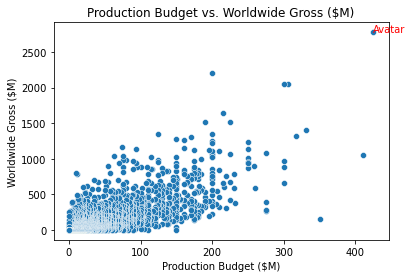

In [10]:
#Visualizing data after data cleaning process
ax = sns.scatterplot(x=df_tn_movie_budgets['production_budget_edited'], y=df_tn_movie_budgets['worldwide_gross_edited'])

#Setting axis labels
ax.set_title('Production Budget vs. Worldwide Gross ($M)')
ax.set_ylabel('Worldwide Gross ($M)')
ax.set_xlabel('Production Budget ($M)')

#Call-out to Avatar film
ax.text(df_tn_movie_budgets.production_budget_edited[df_tn_movie_budgets.movie=='Avatar'],
        df_tn_movie_budgets.worldwide_gross_edited[df_tn_movie_budgets.movie=='Avatar'],
         "Avatar", color='red');

One measure of successful for a film can be seen in the return on investment (ROI) of a film, which we defined as the total revenue generated by a film / production cost of film.

In [11]:
#Calculating an ROI column, based on Worldwide_gross_edited and production_budget_edited from TheNumbers movie budget CSV
df_tn_movie_budgets['ROI'] = df_tn_movie_budgets['worldwide_gross_edited'] / df_tn_movie_budgets['production_budget_edited']

df_tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_edited,domestic_gross_edited,worldwide_gross_edited,ROI
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425.0,760.507625,2776.345279,6.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410.6,241.063875,1045.663875,2.546673
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350.0,42.762350,149.762350,0.427892
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330.6,459.005868,1403.013963,4.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317.0,620.181382,1316.721747,4.153696


In [12]:
#Exploring data under different parameters.
#Wanted to ensure that we were able to explore different subsets of the data. In this case, we were interested in seeing
#films that generated an ROI of 5 or greater
df_tn_movie_budgets_ROIaboveX = df_tn_movie_budgets[df_tn_movie_budgets['ROI'] >= 5]

df_tn_movie_budgets_ROIaboveX.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_edited,domestic_gross_edited,worldwide_gross_edited,ROI
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425.0,760.507625,2776.345279,6.532577
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",306.0,936.662225,2053.311220,6.710167
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",300.0,678.815482,2048.134200,6.827114
26,27,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547","$1,517,935,897",225.0,623.279547,1517.935897,6.746382
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",215.0,652.270625,1648.854864,7.669092


Let's plot this data subset against the original:

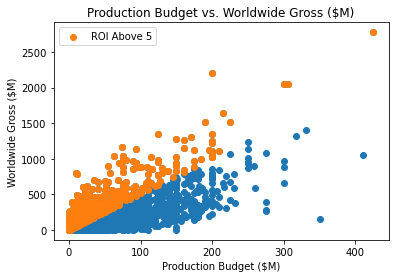

In [13]:
#Plotting our explorations
fig, ax = plt.subplots()

#Plots original data
ax.scatter(x=df_tn_movie_budgets['production_budget_edited'], y=df_tn_movie_budgets['worldwide_gross_edited'])

#Plots subsetted data
ax.scatter(x=df_tn_movie_budgets_ROIaboveX['production_budget_edited'], 
           y=df_tn_movie_budgets_ROIaboveX['worldwide_gross_edited'], label='ROI Above 5')

#Creates title/axis/legend
ax.set_title('Production Budget vs. Worldwide Gross ($M)')
ax.set_ylabel('Worldwide Gross ($M)')
ax.set_xlabel('Production Budget ($M)')
ax.legend(loc='upper left');

>Above: Visualizing movies with a return of investment greater than 5. Those colored in orange have an `ROI` >= 5 and those in blue have an `ROI` < 5. 
***
>Below: Previewing the dataframe sorted by ROI descending.

In [14]:
#Sorting to find highest ROI above 5
df_tn_movie_budgets_ROIaboveX.sort_values('ROI', ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_edited,domestic_gross_edited,worldwide_gross_edited,ROI
5745,46,"Jun 30, 1972",Deep Throat,"$25,000","$45,000,000","$45,000,000",0.025,45.000000,45.000000,1800.000000
5613,14,"Mar 21, 1980",Mad Max,"$200,000","$8,750,000","$99,750,000",0.200,8.750000,99.750000,498.750000
5492,93,"Sep 25, 2009",Paranormal Activity,"$450,000","$107,918,810","$194,183,034",0.450,107.918810,194.183034,431.517853
5679,80,"Jul 10, 2015",The Gallows,"$100,000","$22,764,410","$41,656,474",0.100,22.764410,41.656474,416.564740
5406,7,"Jul 14, 1999",The Blair Witch Project,"$600,000","$140,539,099","$248,300,000",0.600,140.539099,248.300000,413.833333
...,...,...,...,...,...,...,...,...,...,...
4290,91,"Sep 18, 1981",Mommie Dearest,"$5,000,000","$19,032,000","$25,032,000",5.000,19.032000,25.032000,5.006400
3851,52,"Feb 12, 2010",My Name is Khan,"$8,470,000","$4,046,336","$42,355,526",8.470,4.046336,42.355526,5.000652
3176,77,"Dec 20, 1989",Born on the Fourth of July,"$14,000,000","$70,001,698","$70,001,698",14.000,70.001698,70.001698,5.000121
3373,74,"Oct 7, 1960",Spartacus,"$12,000,000","$30,000,000","$60,000,000",12.000,30.000000,60.000000,5.000000


### Data Cleaning Continued

In order to get meaningful data to use genre, we had to access The Movie DataBase's API and retrieve the genre key in order to map the codes listed in `genre_ids`. After retrieving the key, we realized that the API key and the `genre_ids` had a datatype mismatch. 

We had to decide which datatype can work and came to the conclusion to convert the keys that we received from API (int) to match `genre_ids` in the dataframe (string).

In addition, we realized that `genre_ids` was a string disguised as a list. In order to clean this, we had to strip the punctuations and symbols and split the string into a new column titled genre. 

In [15]:
df_tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [16]:
print(df_tmdb_movies['genre_ids'][0])
print(type(df_tmdb_movies['genre_ids'][0]))
#Realized that genre_id is not an actual list but a string disguised as a list

[12, 14, 10751]
<class 'str'>


In [17]:
#In order to translate the genre_ids into meaningful genre names, we must retrieve the genre key from TMDB:

with open('.secrets/creds.json') as f:
    creds = json.load(f)
    
url = 'https://api.themoviedb.org/3/genre/movie/list?api_key={}&language=en-US'.format(creds['key'])

#Preview results
tmdb_genre = requests.get(url)
print(tmdb_genre)
print(type(tmdb_genre.content))
print(tmdb_genre.text)

<Response [200]>
<class 'bytes'>
{"genres":[{"id":28,"name":"Action"},{"id":12,"name":"Adventure"},{"id":16,"name":"Animation"},{"id":35,"name":"Comedy"},{"id":80,"name":"Crime"},{"id":99,"name":"Documentary"},{"id":18,"name":"Drama"},{"id":10751,"name":"Family"},{"id":14,"name":"Fantasy"},{"id":36,"name":"History"},{"id":27,"name":"Horror"},{"id":10402,"name":"Music"},{"id":9648,"name":"Mystery"},{"id":10749,"name":"Romance"},{"id":878,"name":"Science Fiction"},{"id":10770,"name":"TV Movie"},{"id":53,"name":"Thriller"},{"id":10752,"name":"War"},{"id":37,"name":"Western"}]}


In [18]:
#Converting byte into json file
tmdb_genre = tmdb_genre.json()
tmdb_genre

{'genres': [{'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'},
  {'id': 16, 'name': 'Animation'},
  {'id': 35, 'name': 'Comedy'},
  {'id': 80, 'name': 'Crime'},
  {'id': 99, 'name': 'Documentary'},
  {'id': 18, 'name': 'Drama'},
  {'id': 10751, 'name': 'Family'},
  {'id': 14, 'name': 'Fantasy'},
  {'id': 36, 'name': 'History'},
  {'id': 27, 'name': 'Horror'},
  {'id': 10402, 'name': 'Music'},
  {'id': 9648, 'name': 'Mystery'},
  {'id': 10749, 'name': 'Romance'},
  {'id': 878, 'name': 'Science Fiction'},
  {'id': 10770, 'name': 'TV Movie'},
  {'id': 53, 'name': 'Thriller'},
  {'id': 10752, 'name': 'War'},
  {'id': 37, 'name': 'Western'}]}

In [19]:
# Converting json into a python dictionary to be used 
# later to convert genre_ids to meaningful labels
tmdb_genre_dict = {}

for x in range(len(tmdb_genre['genres'])):
    entry = {tmdb_genre['genres'][x]['id']: tmdb_genre['genres'][x]['name']}
    tmdb_genre_dict.update(entry)

tmdb_genre_dict

{28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western'}

In [20]:
# Converting the dictionary keys from int to str to match genre_id datatype
keys_values = tmdb_genre_dict.items()

tmdb_genre_dict = {str(key): str(value) for key, value in keys_values}
tmdb_genre_dict

{'28': 'Action',
 '12': 'Adventure',
 '16': 'Animation',
 '35': 'Comedy',
 '80': 'Crime',
 '99': 'Documentary',
 '18': 'Drama',
 '10751': 'Family',
 '14': 'Fantasy',
 '36': 'History',
 '27': 'Horror',
 '10402': 'Music',
 '9648': 'Mystery',
 '10749': 'Romance',
 '878': 'Science Fiction',
 '10770': 'TV Movie',
 '53': 'Thriller',
 '10752': 'War',
 '37': 'Western'}

In [21]:
# Cleaning genre_ids column to parse through in the future 
df_tmdb_movies['genre'] = df_tmdb_movies['genre_ids'].str.strip('[]')
df_tmdb_movies['genre'] = df_tmdb_movies['genre'].str.replace(' ', '')
df_tmdb_movies['genre'] = df_tmdb_movies['genre'].str.split(',')
# Removed spaces and punctuations
df_tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"[12, 14, 10751]"
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"[14, 12, 16, 10751]"
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"[12, 28, 878]"
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"[16, 35, 10751]"
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"[28, 878, 12]"


### Narrowing our data and creating a singular "master" data set for analysis

We had to decide how we wanted to join our two tables. Our questions are mainly centered around budget so we came to the conclusion that we will only factor in movies that contain budget data, and decidedly so used an inner join. We had to convert the `release_date` so they had matching datatypes in both tables and used the combination of `title` & `release_date` to merge the two.

This would inherently give us genres, budgets, and months (used for seasons) in one table.

In [22]:
#We wanted a single master dataframe to house our main data. We used the shape of the two
#dataframes to get an idea of what our joint table would look like.
print('TMDB DF SHAPE:',df_tmdb_movies.shape)
print('TNBUD DF SHAPE:',df_tn_movie_budgets.shape)

TMDB DF SHAPE: (26517, 11)
TNBUD DF SHAPE: (5782, 10)


In [23]:
#Merged TheNumbers Movie budget dataframe and TheMovieDatabase dataframe 
#on a unique combination of [movie_title, release_date]

df_tn_movie_budgets['release_date'] = pd.to_datetime(df_tn_movie_budgets['release_date'])
df_tmdb_movies['release_date'] = pd.to_datetime(df_tmdb_movies['release_date'])
tn_tmdb_merged_df = df_tmdb_movies.merge(df_tn_movie_budgets, how='inner', left_on=['original_title','release_date'], 
                                         right_on=['movie','release_date'])
tn_tmdb_merged_df

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre,id_y,movie,production_budget,domestic_gross,worldwide_gross,production_budget_edited,domestic_gross_edited,worldwide_gross_edited,ROI
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"[14, 12, 16, 10751]",30,How to Train Your Dragon,"$165,000,000","$217,581,232","$494,870,992",165.00,217.581232,494.870992,2.999218
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"[12, 28, 878]",15,Iron Man 2,"$170,000,000","$312,433,331","$621,156,389",170.00,312.433331,621.156389,3.653861
2,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"[16, 35, 10751]",37,Toy Story,"$30,000,000","$191,796,233","$364,545,516",30.00,191.796233,364.545516,12.151517
3,2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"[16, 35, 10751]",37,Toy Story,"$30,000,000","$191,796,233","$364,545,516",30.00,191.796233,364.545516,12.151517
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"[28, 878, 12]",38,Inception,"$160,000,000","$292,576,195","$835,524,642",160.00,292.576195,835.524642,5.222029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,24598,"[53, 18, 27]",510284,en,Braid,5.972,2019-02-01,Braid,6.4,18,"[53, 18, 27]",48,Braid,"$1,660,000",$0,"$80,745",1.66,0.000000,0.080745,0.048642
1397,24638,"[18, 10752]",514407,en,Indivisible,5.599,2018-10-26,Indivisible,5.4,13,"[18, 10752]",93,Indivisible,"$2,700,000","$3,511,417","$3,588,305",2.70,3.511417,3.588305,1.329002
1398,24691,"[18, 28, 80]",547590,en,El Chicano,5.274,2019-05-03,El Chicano,9.0,1,"[18, 28, 80]",16,El Chicano,"$8,000,000","$700,261","$700,261",8.00,0.700261,0.700261,0.087533
1399,24815,"[18, 35, 28, 80]",506971,ur,Teefa in Trouble,4.486,2018-07-20,Teefa in Trouble,7.6,11,"[18, 35, 28, 80]",8,Teefa in Trouble,"$1,500,000",$0,"$98,806",1.50,0.000000,0.098806,0.065871


We expanded every element in the list of the cleaned `genre_ids`. Then mapped each value based on their keys from the TMDB API Dictionary.

In [24]:
#This function converted a string to a genre based on the genre_dictionary
def genreID_coverter(string):
    if string is not None and len(string) > 0:
        return tmdb_genre_dict[string]

In [25]:
#Split the genres into new columns
df_tmdb_movies_genresplit = pd.DataFrame(tn_tmdb_merged_df['genre'].values.tolist())

for i in range (6):
    df_tmdb_movies_genresplit[i] = df_tmdb_movies_genresplit[i].apply(genreID_coverter)

df_tmdb_movies_genresplit.columns = ['genre1', 'genre2','genre3','genre4','genre5','genre6', 'genre7']

df_tmdb_movies_genresplit

,genre1,genre2,genre3,genre4,genre5,genre6,genre7
0,Fantasy,Adventure,Animation,Family,None,None,None
1,Adventure,Action,Science Fiction,None,None,None,None
2,Animation,Comedy,Family,None,None,None,None
3,Animation,Comedy,Family,None,None,None,None
4,Action,Science Fiction,Adventure,None,None,None,None
...,...,...,...,...,...,...,...
1396,Thriller,Drama,Horror,None,None,None,None
1397,Drama,War,None,None,None,None,None
1398,Drama,Action,Crime,None,None,None,None
1399,Drama,Comedy,Action,Crime,None,None,None


After doing so, we had to concatenate the two dataframes so that the genres matched with the correct movies, dropping columns that were unnecessary to our analysis. Then we created a function to map the month to the appropriate season and created a new column for year.

We also searched the count of movies for each year. In order to mediate outliers, we decided to use movies between 2010 and 2018, where most of the data lied. 

In [26]:
#Created a cleaned joint table from above
df_MAIN = pd.concat([tn_tmdb_merged_df, df_tmdb_movies_genresplit], axis=1)
df_MAIN.drop(columns=['Unnamed: 0', 'id_x', 'genre_ids', 'domestic_gross', 'worldwide_gross','production_budget', 'id_y', 
                     'original_title', 'movie', 'original_language'], inplace=True)

#Function to convert month to season
def season_code_converter(month):
    season_code = month%12 // 3 + 1
    season_code_to_month = {1: 'Winter',
                            2: 'Spring',
                            3: 'Summer',
                            4: 'Autumn'} 
    return season_code_to_month[season_code]

#Created a new column for season
df_MAIN['season'] = pd.DatetimeIndex(df_MAIN['release_date']).month
for x in range(len(df_MAIN)):
    df_MAIN['season'].iloc[x] = (season_code_converter(df_MAIN['release_date'].iloc[x].month))
    
#Create a column for months
df_MAIN['month'] = pd.DatetimeIndex(df_MAIN['release_date']).month

#Created a new column for year    
df_MAIN['year'] = pd.DatetimeIndex(df_MAIN['release_date']).year

#Viewed how many films per year
df_view_counts = df_MAIN.groupby('year').count()
df_view_counts

,popularity,release_date,title,vote_average,vote_count,genre,production_budget_edited,domestic_gross_edited,worldwide_gross_edited,ROI,genre1,genre2,genre3,genre4,genre5,genre6,genre7,season,month
year,,,,,,,,,,,,,,,,,,,
1977,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1
1979,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1
1982,4,4,4,4,4,4,4,4,4,4,4,4,3,0,0,0,0,4,4
1984,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1
1985,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1
1986,4,4,4,4,4,4,4,4,4,4,4,4,0,0,0,0,0,4,4
1988,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,3,3
1992,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1
1995,6,6,6,6,6,6,6,6,6,6,6,6,5,2,0,0,0,6,6


Created a function parse through a specific genre across the genre columns and return as a dataframe. Created this in the hopes to parse each genre dataframe with any assessment we thought fit. 

In [27]:
#Created a function to return a genre specified dataframe
def queryGenre(genreTypeString, dataFrame):
    dataFrameToBeReturned = dataFrame.query("""
                (genre1 == '{}') or \
                (genre2 == '{}') or \
                (genre3 == '{}') or \
                (genre4 == '{}') or \
                (genre5 == '{}') or \
                (genre6 == '{}') or \
                (genre7 == '{}')
                """.format(genreTypeString,genreTypeString,genreTypeString,genreTypeString,
                           genreTypeString,genreTypeString,genreTypeString))
    return dataFrameToBeReturned

genre_df_dictionary = {}
for key, value in tmdb_genre_dict.items():
    genre_df_dictionary[value] = (queryGenre(value, df_MAIN))
    
#Movies with western as a genre
genre_df_dictionary['Western'] 

,popularity,release_date,title,vote_average,vote_count,genre,production_budget_edited,domestic_gross_edited,worldwide_gross_edited,ROI,genre1,genre2,genre3,genre4,genre5,genre6,genre7,season,month,year
29,13.467,2010-06-18,Jonah Hex,4.6,708,"[28, 37, 18, 14, 53]",47.0,10.547117,11.022696,0.234525,Action,Western,Drama,Fantasy,Thriller,None,None,Summer,6,2010
30,13.118,2010-12-22,True Grit,7.2,2816,"[18, 12, 37]",35.0,171.243005,252.276928,7.207912,Drama,Adventure,Western,None,None,None,None,Winter,12,2010
97,8.259,2010-12-03,The Warrior's Way,6.1,203,"[12, 14, 28, 37, 53]",42.0,5.666340,8.514325,0.202722,Adventure,Fantasy,Action,Western,Thriller,None,None,Winter,12,2010
263,7.548,2011-10-07,Blackthorn,6.7,111,"[12, 28, 37]",4.5,0.200558,1.217307,0.270513,Adventure,Action,Western,None,None,None,None,Autumn,10,2011
307,21.260,2012-12-25,Django Unchained,8.0,15725,"[18, 37]",100.0,162.805434,449.948323,4.499483,Drama,Western,None,None,None,None,None,Winter,12,2012
532,8.166,2013-08-16,Ain't Them Bodies Saints,6.2,217,"[80, 18, 10749, 37]",5.0,0.391611,1.075009,0.215002,Crime,Drama,Romance,Western,None,None,None,Summer,8,2013
674,9.723,2014-09-05,Frontera,6.3,80,"[37, 18]",2.3,0.059696,0.059696,0.025955,Western,Drama,None,None,None,None,None,Autumn,9,2014
756,20.681,2015-12-25,The Hateful Eight,7.7,8065,"[80, 18, 9648, 37]",62.0,54.117416,147.864886,2.384918,Crime,Drama,Mystery,Western,None,None,None,Winter,12,2015
757,20.681,2015-12-25,The Hateful Eight,7.7,8065,"[80, 18, 9648, 37]",62.0,54.117416,147.864886,2.384918,Crime,Drama,Mystery,Western,None,None,None,Winter,12,2015
766,19.410,2015-12-25,The Revenant,7.4,11064,"[37, 18, 12]",135.0,183.637894,532.938302,3.947691,Western,Drama,Adventure,None,None,None,None,Winter,12,2015


In [28]:
#Created a dataframe to retrieve the counts of all genres 
df_genre_counts = pd.DataFrame(columns=['genre', 'genre_counts'])

new_dict = {}
for key, value in genre_df_dictionary.items():
    new_dict[key] = len(genre_df_dictionary[key])

value_df_genre_counts = df_genre_counts.append(new_dict, ignore_index=True).T.iloc[2:]

value_df_genre_counts.sort_values(by=0, ascending=False)

,0
Drama,677
Comedy,465
Thriller,403
Action,383
Adventure,274
Crime,204
Science Fiction,179
Romance,177
Horror,167
Family,162


In [29]:
#Updated the above dataframe to only house 2010-2018 movies
df_MAIN = df_MAIN.query("year >=2010 & year<=2018")

In [30]:
#View our new dataframe
df_MAIN

,popularity,release_date,title,vote_average,vote_count,genre,production_budget_edited,domestic_gross_edited,worldwide_gross_edited,ROI,genre1,genre2,genre3,genre4,genre5,genre6,genre7,season,month,year
0,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"[14, 12, 16, 10751]",165.0,217.581232,494.870992,2.999218,Fantasy,Adventure,Animation,Family,None,None,None,Spring,3,2010
1,28.515,2010-05-07,Iron Man 2,6.8,12368,"[12, 28, 878]",170.0,312.433331,621.156389,3.653861,Adventure,Action,Science Fiction,None,None,None,None,Spring,5,2010
4,27.920,2010-07-16,Inception,8.3,22186,"[28, 878, 12]",160.0,292.576195,835.524642,5.222029,Action,Science Fiction,Adventure,None,None,None,None,Summer,7,2010
6,23.673,2010-07-09,Despicable Me,7.2,10057,"[16, 10751, 35]",69.0,251.513985,543.464573,7.876298,Animation,Family,Comedy,None,None,None,None,Summer,7,2010
7,22.020,2010-03-05,Alice in Wonderland,6.6,8713,"[10751, 14, 12]",200.0,334.191110,1025.491110,5.127456,Family,Fantasy,Adventure,None,None,None,None,Spring,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,6.971,2018-10-26,Air Strike,3.9,56,"[18, 10752, 28, 12]",65.0,0.000000,0.516279,0.007943,Drama,War,Action,Adventure,None,None,None,Autumn,10,2018
1395,6.107,2018-04-13,Sgt. Stubby: An American Hero,6.4,9,"[16, 12, 10751, 36, 10752]",25.0,3.054285,3.645957,0.145838,Animation,Adventure,Family,History,War,None,None,Spring,4,2018
1397,5.599,2018-10-26,Indivisible,5.4,13,"[18, 10752]",2.7,3.511417,3.588305,1.329002,Drama,War,None,None,None,None,None,Autumn,10,2018
1399,4.486,2018-07-20,Teefa in Trouble,7.6,11,"[18, 35, 28, 80]",1.5,0.000000,0.098806,0.065871,Drama,Comedy,Action,Crime,None,None,None,Summer,7,2018


### Visualization on Cleaned Data

The first graph shows the production budget against the international grossing by each genre. From here we can visualize which genres had high, medium and low budgets against the total international grossing of film. After viewing this however, we thought it would be better to plot genres with similar budgets against one another and see how the international grossing compares to said genres of similar budgets. The red line simply shows the threshold for where movies start becoming profitiable (ROI = 1).

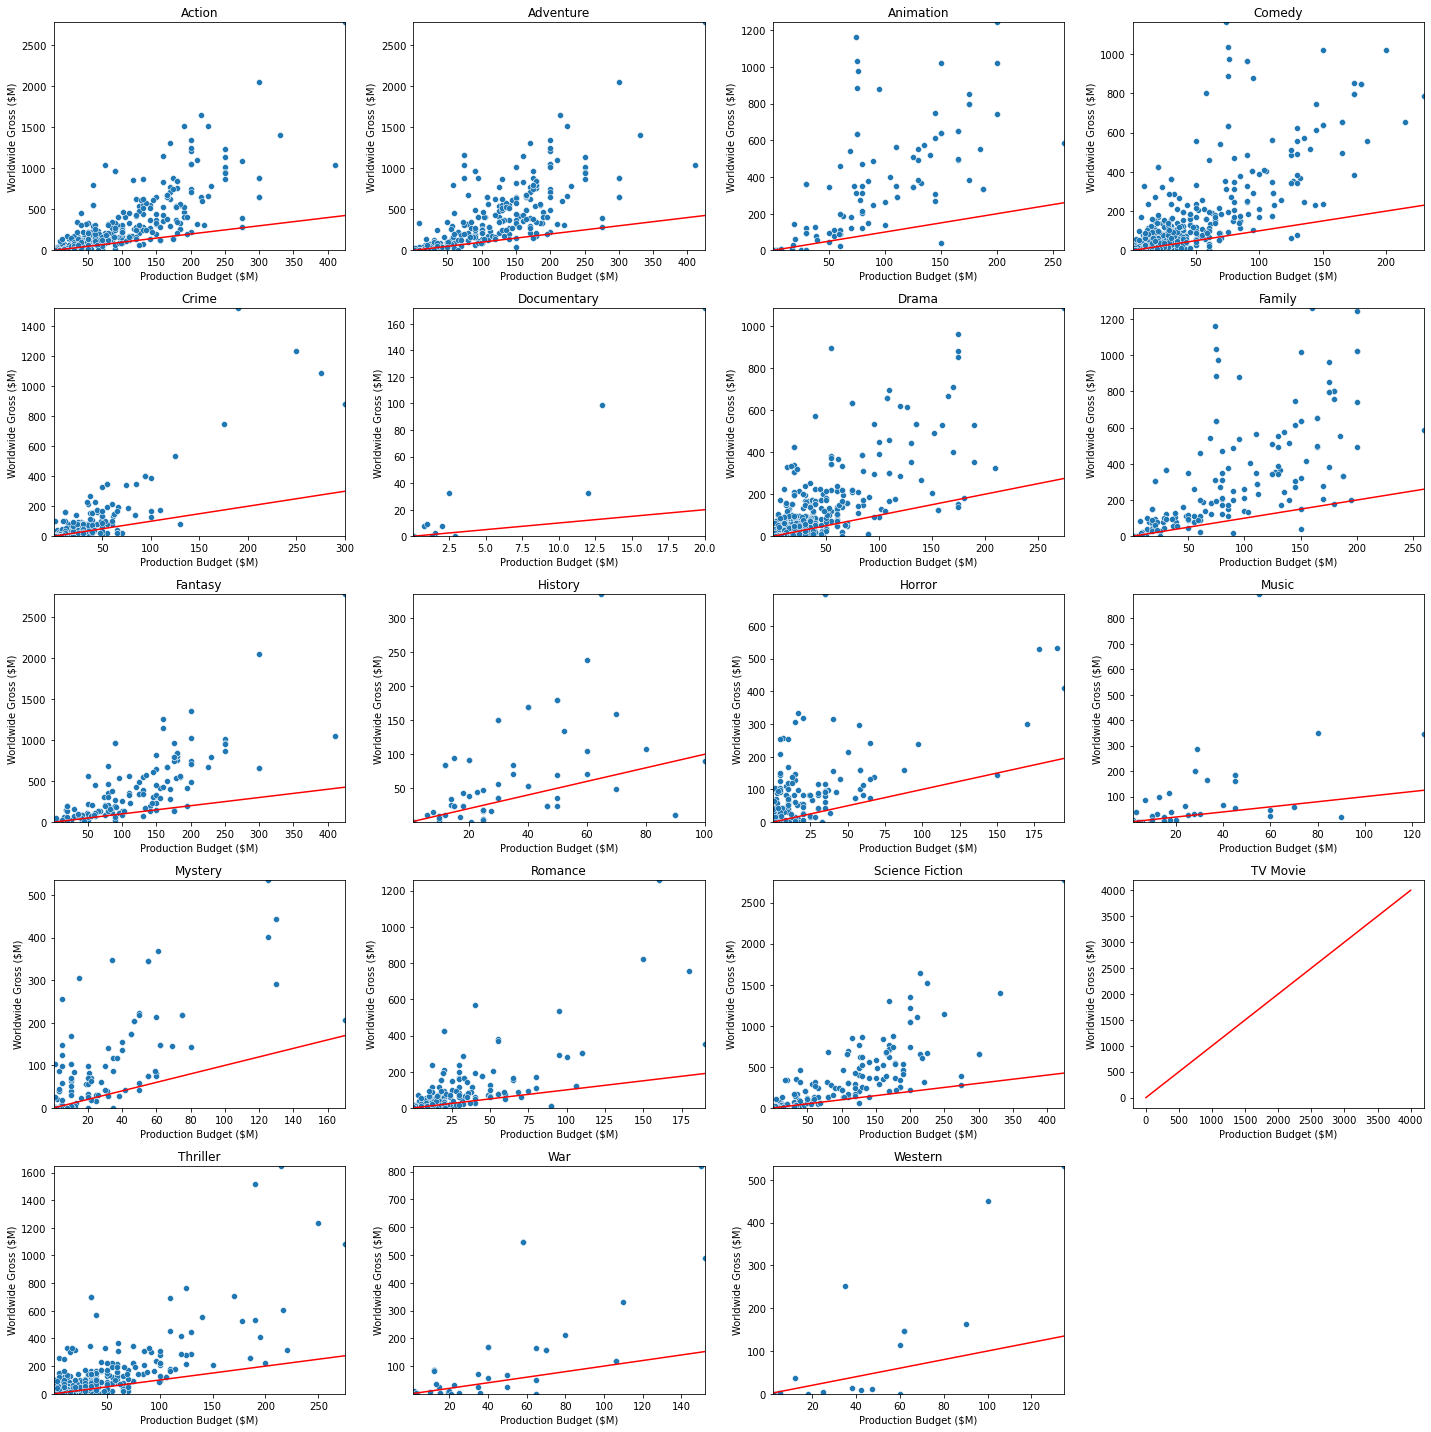

In [31]:
#Plotted budget vs world wide grossing for each genre

#Coordinates to plot the ROI = 1
x_slope1 = np.linspace(0,4000)
y_slope1 = np.linspace(0,4000)

col_nums = 4
row_nums = 5
plt.figure(figsize=(20, 20))

#For loop to plot each genre
for i, (key, v) in enumerate(genre_df_dictionary.items(), 1):
    plt.subplot(row_nums, col_nums, i)
    try:
        p = sns.scatterplot(data=v, x='production_budget_edited', y='worldwide_gross_edited').set(
            xlim=(genre_df_dictionary[key]['production_budget_edited'].min(), 
                  genre_df_dictionary[key]['production_budget_edited'].max()), 
            ylim=(genre_df_dictionary[key]['worldwide_gross_edited'].min(), 
                  genre_df_dictionary[key]['worldwide_gross_edited'].max()))
        #Plots ROI = 1
        plt.plot(x_slope1, y_slope1, color='r')
        plt.title(key)
        plt.xlabel('Production Budget ($M)')
        plt.ylabel('Worldwide Gross ($M)')
    except:
        #This section is needed for the loop to ignore a null error, where there is no data for the genre: TV Movie
        p = sns.scatterplot(data=v, x='production_budget_edited', y='worldwide_gross_edited')
        plt.plot(x_slope1, y_slope1, color='r')
        plt.title(key)
        plt.xlabel('Production Budget ($M)')
        plt.ylabel('Worldwide Gross ($M)')
        
plt.tight_layout()


Looking at 19 graphs can be overwhelming, so we also wanted to have the capability to preview certain genres.

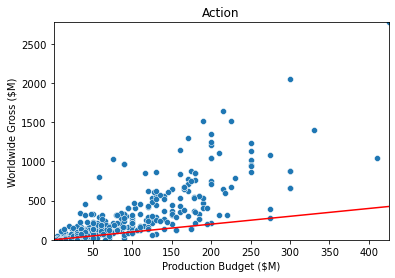

In [32]:
#Isolates a single graph
sns.scatterplot(data=genre_df_dictionary['Action'], x='production_budget_edited', y='worldwide_gross_edited').set(
            xlim=(genre_df_dictionary['Action']['production_budget_edited'].min(), genre_df_dictionary['Action']['production_budget_edited'].max()), 
            ylim=(genre_df_dictionary['Action']['worldwide_gross_edited'].min(), genre_df_dictionary['Action']['worldwide_gross_edited'].max()))
plt.plot(x_slope1, y_slope1, color='r')

plt.title('Action')
plt.xlabel('Production Budget ($M)')
plt.ylabel('Worldwide Gross ($M)');

#### Budget for each genre?
We acquired all movies and their production budget by each genre. Initially, we plotted and compared the budgets for each genre all in one but decided it would be better to split it into groups: genres with high budgets, medium budgets, and low budgets. We then visualized it on violin plots, where we realized that the median figure is more reliable, as most genres have a number of outliers.

In [33]:
#creates a genre dataframe with a genre and production cost column
df_genre = pd.DataFrame(columns = ['Genre', 'production_budget_edited'])

#Pull in data for the above dataframe
for key, value in genre_df_dictionary.items():
    df_genre_append = pd.DataFrame({'Genre': [key]*len(genre_df_dictionary[key]),
                            'production_budget_edited': value['production_budget_edited']})
    df_genre = df_genre.append(df_genre_append, ignore_index = True)
    
df_genre

,Genre,production_budget_edited
0,Action,170.0
1,Action,160.0
2,Action,425.0
3,Action,85.0
4,Action,60.0
...,...,...
3622,Western,12.0
3623,Western,18.0
3624,Western,25.0
3625,Western,60.0


Because 19 graphs are overwhelming, we created a subset of the dataframe to show certain genre cuts, and elected for a violin plot in order to illustrate the distribution of data.

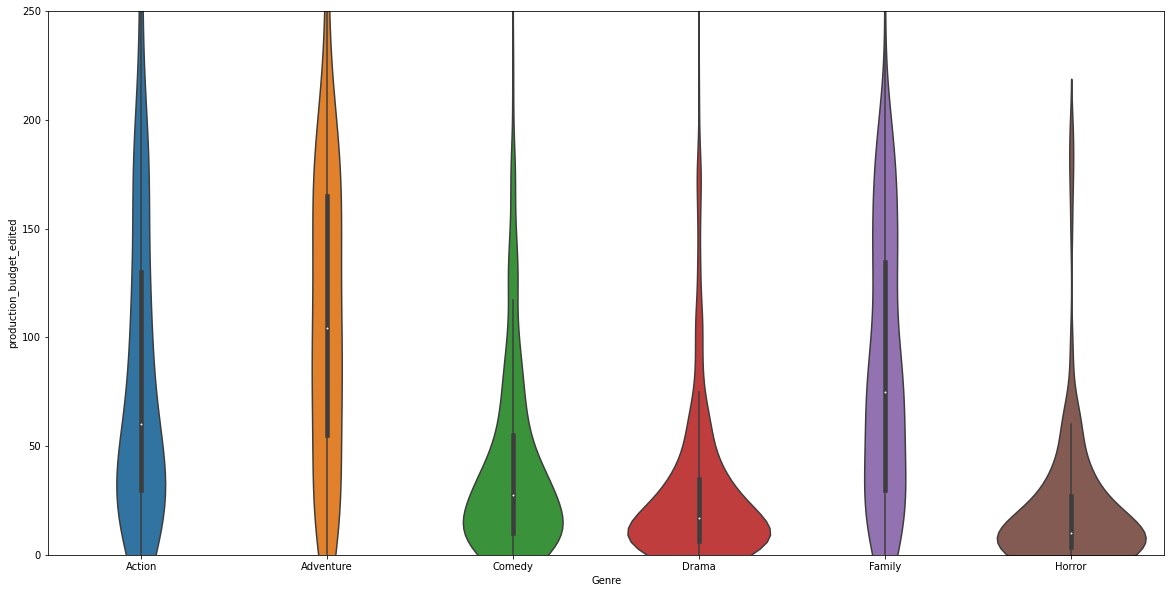

<Figure size 432x288 with 0 Axes>

In [34]:
#Creates new dataframe with same columns
df_genre_cut = pd.DataFrame(columns = ['Genre', 'production_budget_edited'])

#Isolates genres of interest
df_genre_cut = df_genre.loc[(df_genre['Genre'] == 'Action') | (df_genre['Genre'] == 'Adventure')
                           | (df_genre['Genre'] == 'Drama') | (df_genre['Genre'] == 'Comedy')
                           | (df_genre['Genre'] == 'Horror') | (df_genre['Genre'] == 'Family')]
df_genre_cut

#Plots the genres of interest
fig, ax = plt.subplots(figsize=(20,10))

sns.violinplot(ax = ax,
               data = df_genre_cut,
               x = 'Genre',
               y = 'production_budget_edited',
               split = True).set(ylim=(0,250))

plt.show()
plt.tight_layout();

Should we look at the mean production budget as a basis to split out High/Medium/Low costing genres?

In [35]:
df_mean_budget = pd.DataFrame(df_genre.groupby('Genre').production_budget_edited.mean()).reset_index()
df_mean_budget = df_mean_budget.sort_values(by= 'production_budget_edited', ascending=False)
df_mean_budget

,Genre,production_budget_edited
1,Adventure,113.630292
8,Fantasy,105.197771
14,Science Fiction,92.908212
2,Animation,92.838542
0,Action,85.614360
7,Family,85.371296
17,Western,49.200000
16,War,43.648718
3,Comedy,40.305476
4,Crime,36.902426


>Visualizing distribution of production cost for "high" costing genres: (below)

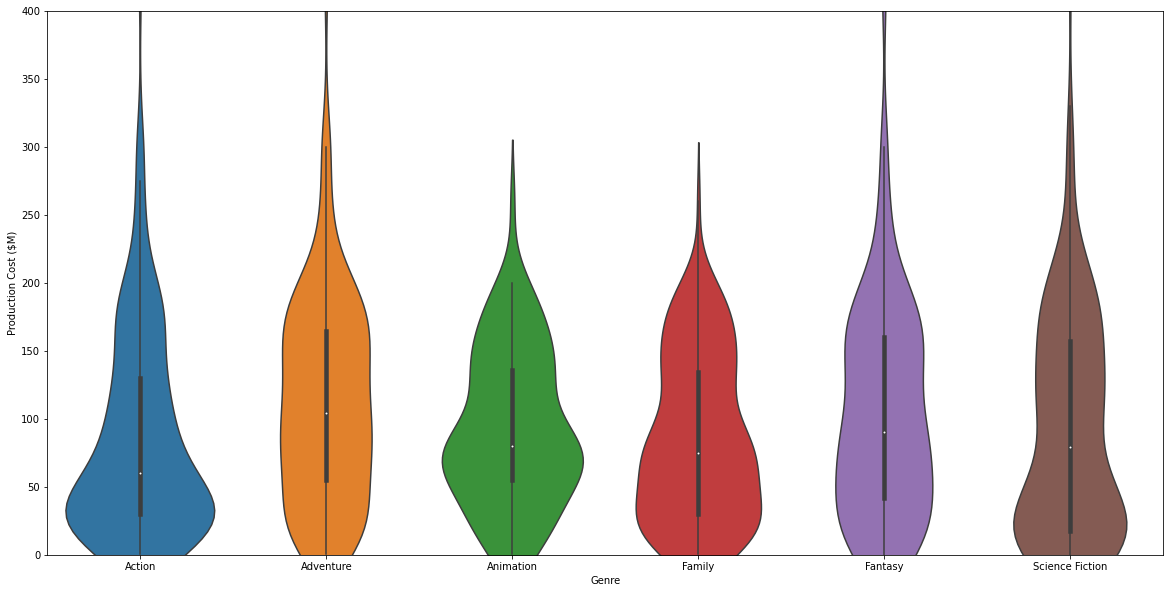

<Figure size 432x288 with 0 Axes>

In [36]:
#Isolates genres of interest and plots to see distribution
df_genre_cut = pd.DataFrame(columns = ['Genre', 'production_budget_edited'])
df_genre_cut = df_genre.loc[(df_genre['Genre'] == 'Adventure') | (df_genre['Genre'] == 'Fantasy')
                           | (df_genre['Genre'] == 'Animation') | (df_genre['Genre'] == 'Science Fiction')
                           | (df_genre['Genre'] == 'Family') | (df_genre['Genre'] == 'Action')]
df_genre_cut

fig, ax = plt.subplots(figsize=(20,10))

p = sns.violinplot(ax = ax, data = df_genre_cut,x = 'Genre', y = 'production_budget_edited',split = True)

p.set(ylim=(0,400))

p.set_ylabel('Production Cost ($M)')

plt.show()
plt.tight_layout();

>Visualizing distribution of production cost for "medium" costing genres: (below)

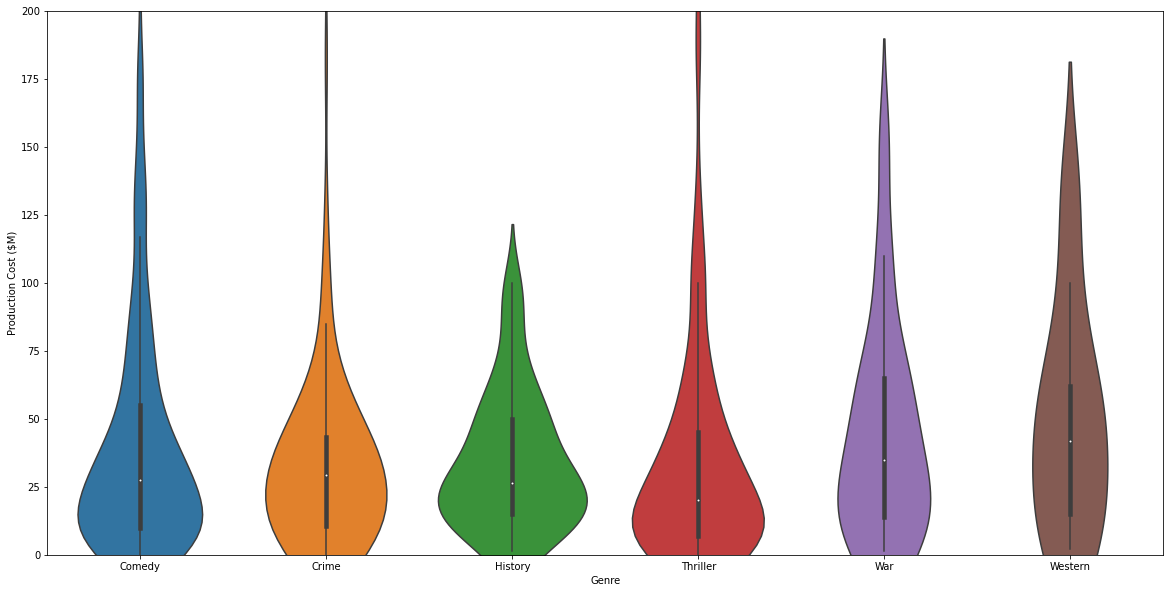

<Figure size 432x288 with 0 Axes>

In [37]:
df_genre_cut = pd.DataFrame(columns = ['Genre', 'production_budget_edited'])
df_genre_cut = df_genre.loc[(df_genre['Genre'] == 'Western') | (df_genre['Genre'] == 'War')
                           | (df_genre['Genre'] == 'Comedy') | (df_genre['Genre'] == 'Crime')
                           | (df_genre['Genre'] == 'Thriller') | (df_genre['Genre'] == 'History')]
df_genre_cut

fig, ax = plt.subplots(figsize=(20,10))

p = sns.violinplot(ax = ax, data = df_genre_cut,x = 'Genre', y = 'production_budget_edited',split = True)

p.set(ylim=(0,200))

p.set_ylabel('Production Cost ($M)')

plt.show()
plt.tight_layout();

>Visualizing distribution of production cost for "low" costing genres: (below)

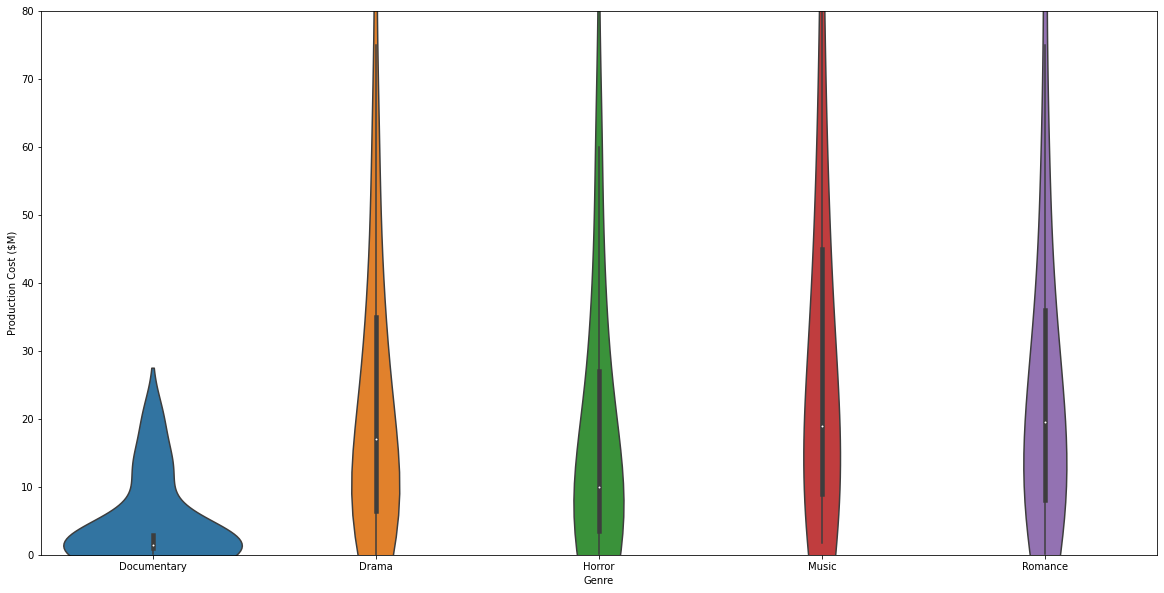

<Figure size 432x288 with 0 Axes>

In [38]:
df_genre_cut = pd.DataFrame(columns = ['Genre', 'production_budget_edited'])
df_genre_cut = df_genre.loc[(df_genre['Genre'] == 'Music') | (df_genre['Genre'] == 'Romance')
                           | (df_genre['Genre'] == 'Drama') | (df_genre['Genre'] == 'Myster')
                           | (df_genre['Genre'] == 'Horror') | (df_genre['Genre'] == 'Documentary')]
df_genre_cut

fig, ax = plt.subplots(figsize=(20,10))

p = sns.violinplot(ax = ax, data = df_genre_cut,x = 'Genre', y = 'production_budget_edited',split = True)

p.set(ylim=(0,80))

p.set_ylabel('Production Cost ($M)')

plt.show()
plt.tight_layout();

Since we've determined that median is a better measure of the center of our data, let's split the production budget of the genres by median to illustrate High/Medium/Low costing genres:

In [39]:
df_median_budget = pd.DataFrame(df_genre.groupby('Genre').production_budget_edited.median()).reset_index()
df_median_budget = df_median_budget.sort_values(by= 'production_budget_edited', ascending=False)
df_median_budget

,Genre,production_budget_edited
1,Adventure,104.50
8,Fantasy,90.00
2,Animation,80.00
14,Science Fiction,79.00
7,Family,75.00
0,Action,60.00
17,Western,42.00
16,War,35.00
4,Crime,29.50
3,Comedy,27.50


#### Production Budget vs. Return of Investment

Does a certain budget guarantee a certain return of investment? Well, we had to find out for ourselves. And short is, no. We come to find that no matter how much you spend on the budget, whether it be high or low, doesn't guarantee a certain return of investment. In actuality, production budget and international grossing is sporadic across films and across genres.

The correlation coefficiant (-0.047408) between the return of investment against the production budget allows us to conclude that the two variables have no linear correlation. We then plotted and found the same result. 

In [40]:
#Correlation between Production budget and ROI
df_ROI_vs_PBE = df_MAIN[["ROI","production_budget_edited"]]
df_ROI_corr = df_ROI_vs_PBE.corr()
df_ROI_corr

,ROI,production_budget_edited
ROI,1.000000,-0.047408
production_budget_edited,-0.047408,1.000000


<Figure size 720x720 with 0 Axes>

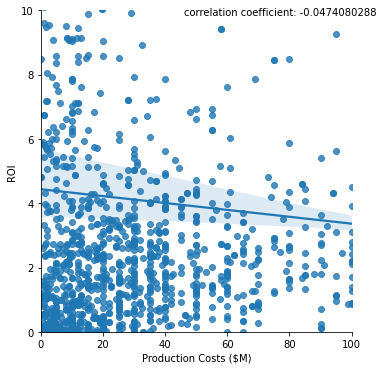

In [41]:
#Graph scatterplot of production budget vs ROI
fig = plt.figure(figsize=(10,10))

#Graphs a best-fit line
ax = sns.lmplot(x='production_budget_edited', y='ROI', data=df_MAIN)
ax.set(ylim=(0,10), xlim=(0,100))

#Creates correlation coefficient label
corr_coef = round(df_ROI_corr.ROI[1],10)
corr_label = "correlation coefficient: {}".format(corr_coef)

#X-axis label
plt.xlabel('Production Costs ($M)')

#Plots custom text
ax.fig.suptitle(corr_label, fontsize=10, ha='left');

### Genre and Return of Investment

Similarly to genre and production budget, we investigated if there's a certain return of investment dependent on genre. We retrieved the median `production_budget_edited` for each genre and the `ROI` for all movies sorted by genre. We then plotted the genre against `ROI` and seperated the genres having similar `ROI`. 

For example, if Microsoft Studios has a high budget, they should should consider doing an animation film as it has the highest return of investment of all movies with high budgets. If Microsoft has a medium budget, they should consider creating an action film as it has the highest return of investment of all movies with medium size budget. And lastly, if the studio has a low budget, they should consider making a horror film.

Dataframe of the median of `production_budget_edited`, split by genre:

Dataframe of ROI and genre:

In [42]:
df_ROI = pd.DataFrame(columns = ['Genre', 'ROI'])

for key, value in genre_df_dictionary.items():
    df_append = pd.DataFrame({'Genre': [key]*len(genre_df_dictionary[key]),
                            'ROI': value['ROI']})
    df_ROI = df_ROI.append(df_append, ignore_index = True)
    
df_ROI

,Genre,ROI
0,Action,3.653861
1,Action,5.222029
2,Action,6.532577
3,Action,3.658837
4,Action,3.572623
...,...,...
3622,Western,3.132025
3623,Western,0.000000
3624,Western,0.150854
3625,Western,1.891025


Dataframe containing just genre and ROI

In [43]:
df_median_ROI = pd.DataFrame(df_ROI.groupby('Genre').ROI.median()).reset_index()
df_median_ROI = df_median_ROI.sort_values(by= 'ROI', ascending=False)
df_median_ROI

,Genre,ROI
2,Animation,3.073531
10,Horror,2.916393
12,Mystery,2.857589
7,Family,2.747853
5,Documentary,2.725037
1,Adventure,2.630671
8,Fantasy,2.627944
3,Comedy,2.559684
14,Science Fiction,2.328300
13,Romance,2.241864


Graphing Median ROI by Genre for 'high' costing genres.

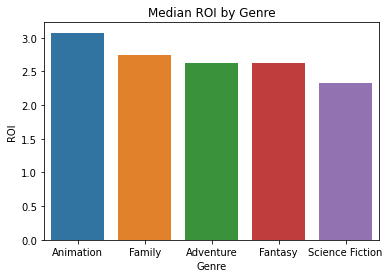

In [44]:
df_ROI_cut = df_median_ROI.loc[(df_median_ROI['Genre'] == 'Adventure') | (df_median_ROI['Genre'] == 'Fantasy')
                           | (df_median_ROI['Genre'] == 'Animation') | (df_median_ROI['Genre'] == 'Science Fiction')
                           | (df_median_ROI['Genre'] == 'Family')]



sns.barplot(x = df_ROI_cut['Genre'],
            y = df_ROI_cut['ROI'],).set(
                                    title= "Median ROI by Genre",
                                    ylabel = "ROI");

Graphing Median ROI by Genre for 'medium' costing genres.

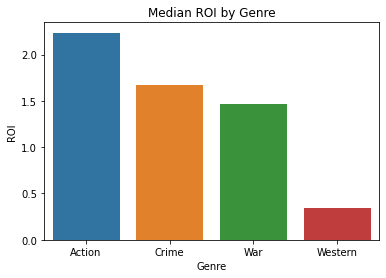

In [45]:
df_ROI_cut = df_median_ROI.loc[(df_median_ROI['Genre'] == 'Action') | (df_median_ROI['Genre'] == 'Western')
                           | (df_median_ROI['Genre'] == 'War') | (df_median_ROI['Genre'] == 'Crime')]



sns.barplot(x = df_ROI_cut['Genre'],
            y = df_ROI_cut['ROI'],).set(
                                    title= "Median ROI by Genre",
                                    ylabel = "ROI");

Graphing Median ROI by Genre for 'low' costing genres.

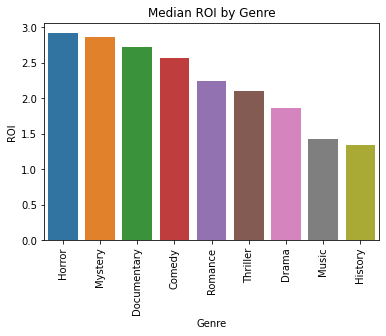

In [46]:
df_ROI_cut = df_median_ROI.loc[(df_median_ROI['Genre'] == 'Comedy') | (df_median_ROI['Genre'] == 'History')
                            | (df_median_ROI['Genre'] == 'Mystery') | (df_median_ROI['Genre'] == 'Thriller')
                            | (df_median_ROI['Genre'] == 'Romance') | (df_median_ROI['Genre'] == 'Music')
                            | (df_median_ROI['Genre'] == 'Drama') | (df_median_ROI['Genre'] == 'Horror')
                            | (df_median_ROI['Genre'] == 'Documentary')]



sns.barplot(x = df_ROI_cut['Genre'],
            y = df_ROI_cut['ROI'],).set(
                                    title= "Median ROI by Genre",
                                    ylabel = "ROI")
plt.xticks(rotation=90);

In [47]:
#Create a list of all genres
list_of_genres = list(tmdb_genre_dict.values())
list_of_genres

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western']

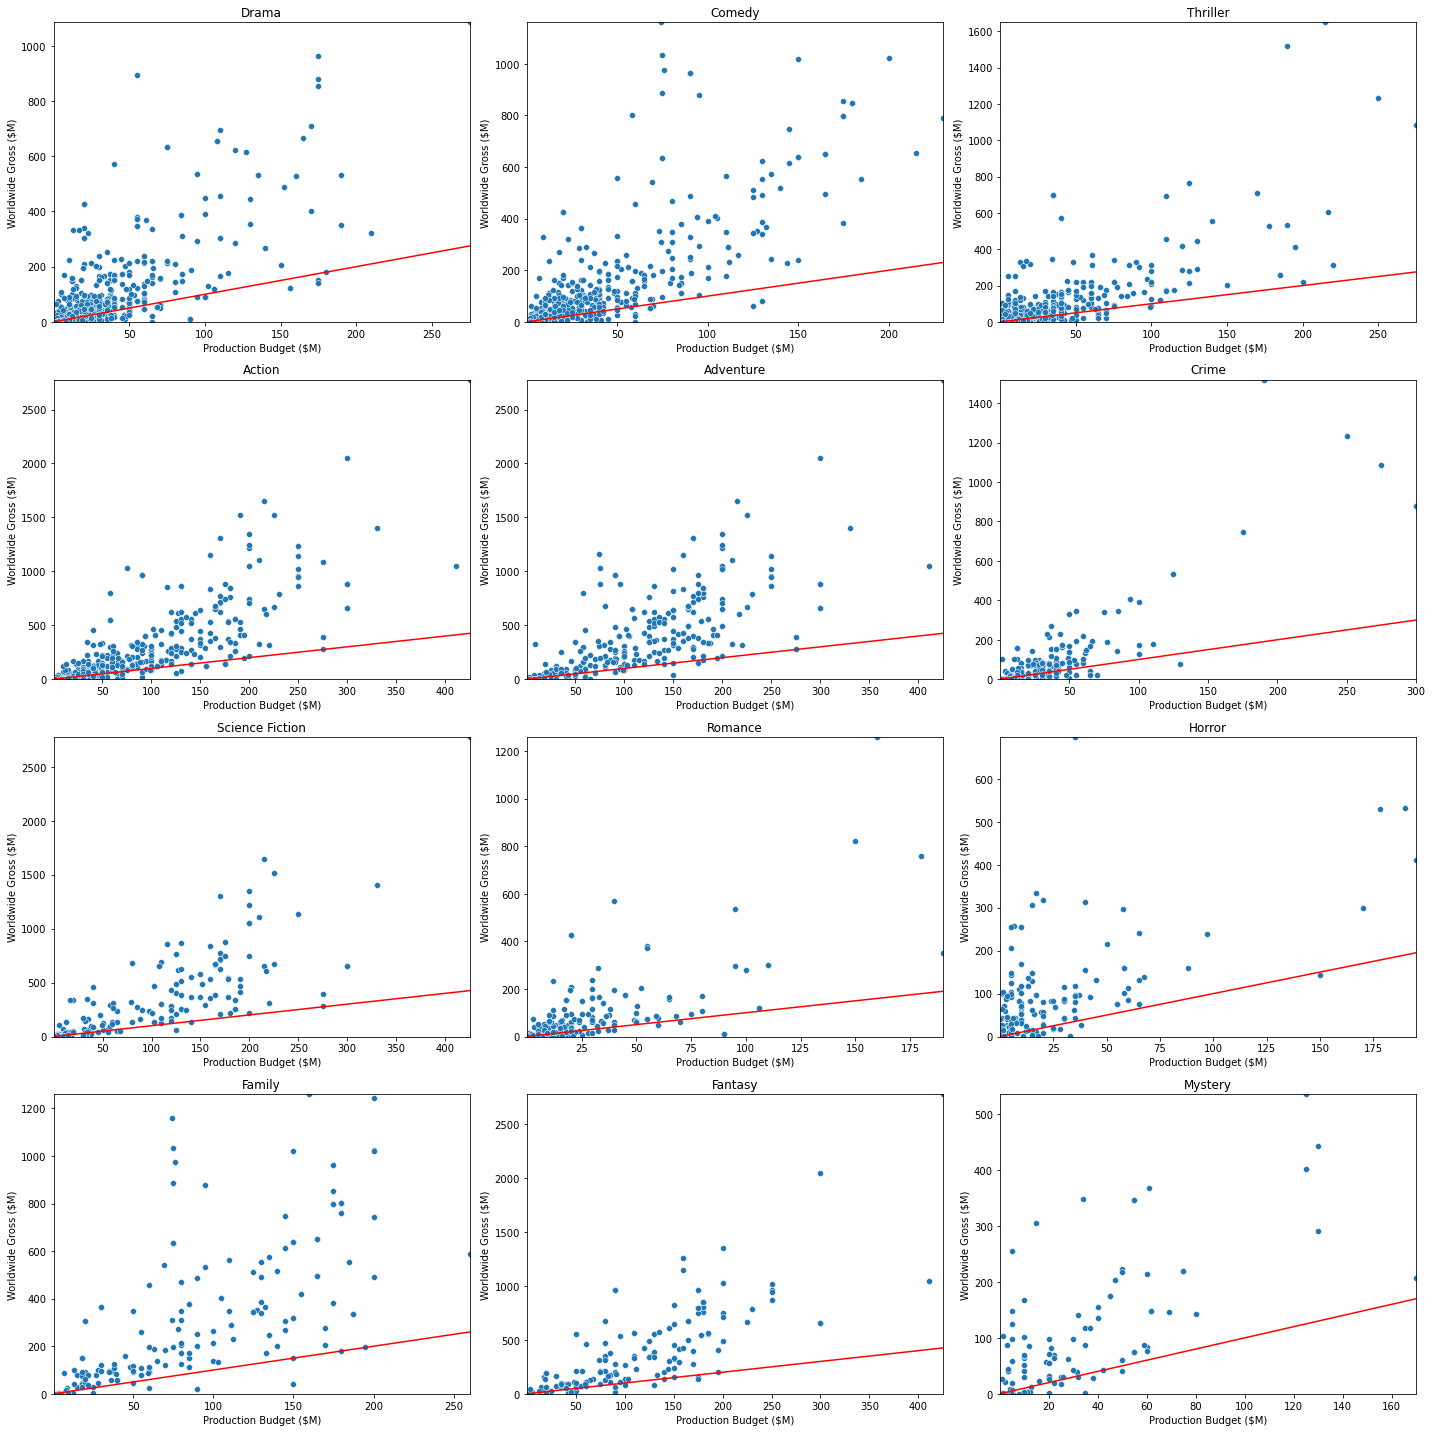

In [48]:
#Wanted to plot selected genres
list_of_genres = ['Drama', 'Comedy', 'Thriller', 'Action', 'Adventure', 'Crime', 'Science Fiction', 'Romance', 'Horror',
                 'Family', 'Fantasy', 'Mystery']

col_nums = 3
row_nums = 4
plt.figure(figsize=(20, 20))
for i, key in enumerate(list_of_genres, 1):
    plt.subplot(row_nums, col_nums, i)
    p = sns.scatterplot(data=genre_df_dictionary[key], x='production_budget_edited', y='worldwide_gross_edited').set(
            xlim=(genre_df_dictionary[key]['production_budget_edited'].min(), genre_df_dictionary[key]['production_budget_edited'].max()), 
            ylim=(genre_df_dictionary[key]['worldwide_gross_edited'].min(), genre_df_dictionary[key]['worldwide_gross_edited'].max()))
    plt.plot(x_slope1, y_slope1, color='r')
    plt.title(key)
    plt.xlabel('Production Budget ($M)')
    plt.ylabel('Worldwide Gross ($M)')

    
plt.tight_layout()

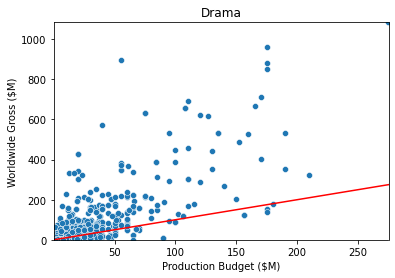

In [49]:
#Wanted to isolate genres graph for any discoveries
sns.scatterplot(data=genre_df_dictionary['Drama'], x='production_budget_edited', y='worldwide_gross_edited').set(
            xlim=(genre_df_dictionary['Drama']['production_budget_edited'].min(), genre_df_dictionary['Drama']['production_budget_edited'].max()), 
            ylim=(genre_df_dictionary['Drama']['worldwide_gross_edited'].min(), genre_df_dictionary['Drama']['worldwide_gross_edited'].max()))
plt.plot(x_slope1, y_slope1, color='r')

plt.title('Drama')
plt.xlabel('Production Budget ($M)')
plt.ylabel('Worldwide Gross ($M)');

### Does the timing of when a movie releases affect grossing? 

First, we plotted the average return of investments across the seasons and noticed that movies released during the Summer had the highest average ROI. We then visualized domestic and international average grossing across the seasons and saw that movies released during the Summer had the highest average grossing with movies released in the Spring coming in a close second. To further investigate, we decided to plot both grossings by each month and were able to visualize that the months between May and July were the highest grossing months. To furthermore reiterate the point, the budgets between these months are also higher indicating that not only are studios spending more on the budget of these movies, but consumers are actually spending more on movies.

season
Autumn    430
Spring    306
Summer    313
Winter    302
Name: ROI, dtype: int64

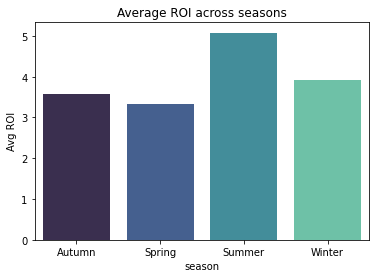

In [50]:
#Chart to view the mean of ROI against each season
grouped_by_season_mean = df_MAIN.groupby('season').ROI.mean()

sns.barplot(x = grouped_by_season_mean.index,
            y = grouped_by_season_mean.values,
           palette = "mako").set(
                                title= "Average ROI across seasons",
                                ylabel = "Avg ROI")
grouped_by_season_count = df_MAIN.groupby('season').ROI.count()
grouped_by_season_count



Looking at historical data, films released in the summer have a higher ROI compared to other seasons. (above)

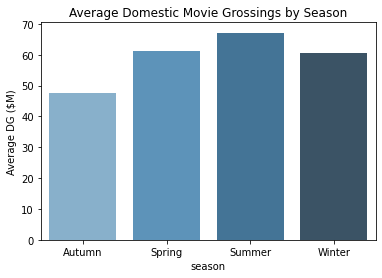

In [51]:
#Chart to view each domestic gross against each season
dge_grouped_by_season_mean = df_MAIN.groupby('season').domestic_gross_edited.mean()
sns.barplot(x = dge_grouped_by_season_mean.index,
            y = dge_grouped_by_season_mean.values,
            palette = "Blues_d").set(
                                    title= "Average Domestic Movie Grossings by Season",
                                    ylabel = "Average DG ($M)");


We see that the average domestic grossing is highest in the Summer

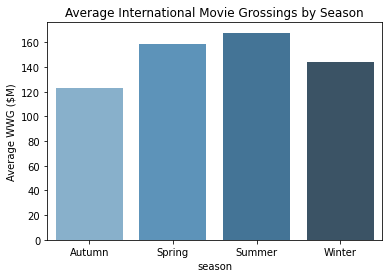

In [52]:
#Chart to view each international gross against each season
wge_grouped_by_season_mean = df_MAIN.groupby('season').worldwide_gross_edited.mean()
sns.barplot(x = wge_grouped_by_season_mean.index,
            y = wge_grouped_by_season_mean.values,
            palette = "Blues_d").set(
                                    title= "Average International Movie Grossings by Season",
                                    ylabel = "Average WWG ($M)");



We see that the average international grossing is highest in the Summer (above)

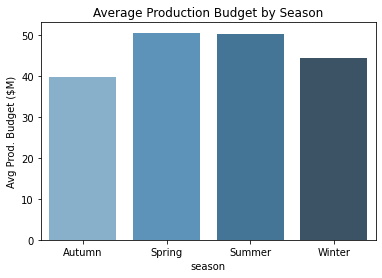

In [59]:
#Chart to show production budget by season
pbe_grouped_by_season_mean = df_MAIN.groupby('season').production_budget_edited.mean()
pbe_grouped_by_season_mean_chart = sns.barplot(x = pbe_grouped_by_season_mean.index,
                                                y = pbe_grouped_by_season_mean.values,
                                                palette = "Blues_d").set(
                                                                        title= "Average Production Budget by Season",
                                                                        ylabel = "Avg Prod. Budget ($M)");


Average production budget across the seasons

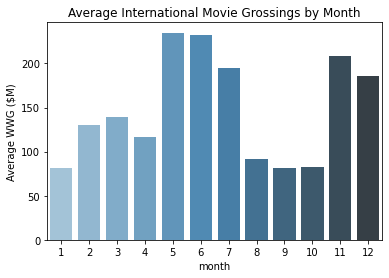

In [53]:
#Chart to show international movie grossing by month
wge_grouped_by_month_mean = df_MAIN.groupby('month').worldwide_gross_edited.mean()
ww_g_m_m_chart = sns.barplot(x = wge_grouped_by_month_mean.index,
                    y = wge_grouped_by_month_mean.values,
                    palette = "Blues_d").set(
                                            title= "Average International Movie Grossings by Month",
                                            ylabel = "Average WWG ($M)");


We see that the average international grossing is highest in the months May, June and July.

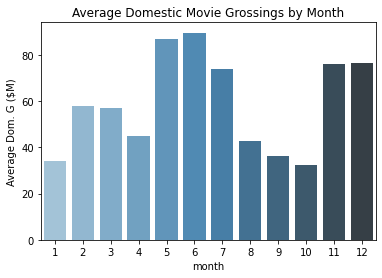

In [54]:
#Chart to show domestic movie grossing by month
dge_grouped_by_month_mean = df_MAIN.groupby('month').domestic_gross_edited.mean()
d_g_m_m_chart = sns.barplot(x = dge_grouped_by_month_mean.index,
                    y = dge_grouped_by_month_mean.values,
                    palette = "Blues_d").set(
                                            title= "Average Domestic Movie Grossings by Month",
                                            ylabel = "Average Dom. G ($M)");


Again same idea with average domestic grossing between months. (above)

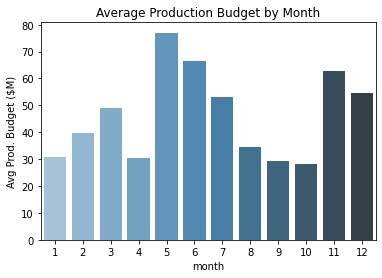

In [61]:
#Average production budget by month.
pbe_grouped_by_month_mean = df_MAIN.groupby('month').production_budget_edited.mean()
pbe_grouped_by_month_mean_chart = sns.barplot(x = pbe_grouped_by_month_mean.index,
                                                y = pbe_grouped_by_month_mean.values,
                                                palette = "Blues_d").set(
                                                                        title= "Average Production Budget by Month",
                                                                        ylabel = "Avg Prod. Budget ($M)");

And lastly the production budget spread between the months. (above)

## Conclusion:
In order for Microsoft's new studio to be successful, we recommend the following:
- Release a movie during the Summer. The data shows movies released during the summertime generate the most overall revenue, resulting in a higher ROI. This could be explained by warm weather encouraging consumers to get out of the house and spend money.
- See Microsoft_Film_Data_Analysis_Part_2 for Director conclusion.
- Genre based on budget:<br>
   If Microsoft has a high budget (more than 75M), we would recommend producing an Animation film. <br>
   If Microsoft has a medium budget (30M-75M), we would recommend producing an Action film.<br>
   If Microsoft has a low budget (less than 30M), we would recommend producing a Horror film.